# Objective
- To extract keywords from the 4nd of May to the 14th of May 2020
- To plot 25 keywords with the most frequency

In [63]:
#packages we will need to achieve our objectives
import pandas as pd
import utils

In [64]:
#fetching our data
path = 'data/processed'
df = pd.read_csv(path+"/COVID19_ZM_transformedTweets.csv")
df.head(1)

,Unnamed: 0,Sentiment,SentimentClass,Unnamed: 0.1,created_at,date,geo,hashtags,id,retweets,text,username
0,0,0.0,Neutral,NaN,2020-05-14 23:58:03+00:00,2020-05-14,NaN,#Health #12millionEuros #BwalyaNgandu,1261083384207433730,3,#Health #12millionEuros #BwalyaNgandu EU gives...,news_ghana


In [65]:
#renaming the date column to created_at
df['created_at'] =  pd.to_datetime(df['date'])
#extracting the date from the created at column and making a date column
df['date'] =  pd.to_datetime(df['created_at']).dt.date
df.head(1)

,Unnamed: 0,Sentiment,SentimentClass,Unnamed: 0.1,created_at,date,geo,hashtags,id,retweets,text,username
0,0,0.0,Neutral,NaN,2020-05-14,2020-05-14,NaN,#Health #12millionEuros #BwalyaNgandu,1261083384207433730,3,#Health #12millionEuros #BwalyaNgandu EU gives...,news_ghana


In [69]:
#Specifying dates for extracting tweets
start_date = "2020-05-04"
stop_date = "2020-05-14"

#Words we dont regard as keywords
meanless_words=['rt','la','ni','kwa','tunduma','related','de','na','ya','http','https','edgarclungu','tame','www','wa','amp','dr','com', \
                    'today','minister','covid_19','like','co','number','facebook','zambian','day','morocco', \
                    'covid-19','zambia','may','covid','coronavirus','covid19zambia','country','za', \
                    'via','us','chng','cases','case','first','tot','total','countries',\
                    'two','amid','must','confirm','bit','confirmed','world','virus',\
                   'time','covid19','edgar','news','update','let','confirms','know','ly', \
                    'ministry','zimbabwe','corona','last','nigeria','mpaka','since', \
                   'botswana', 'burundi','need', 'central' ,'african','republic', 'cote','ivoire', \
                'eritrea','tests','ethiopia', 'kenya', 'malawi','get', 'mozambique', 'namibia', \
                    'rwanda','deaths','president','south' ,'town','africa','100th','eswatini', \
                    'recorded','uganda','24hrs','hours','igshid','tz','p','instagram','nation','one','done','southafrica']

#getting tweets within a specific range
get_tweets=utils.get_tweet_for_specific_range(start_date,stop_date,df)

#Extracting only the text column from the tweets
tweet_txt=get_tweets["text"]

#Merging the entire text column so it becomes one corpus
merged_text_col=utils.merge_df_col_val(tweet_txt)

#Removing the RT username from the tweets
remove_RT_from_text=utils.remove_RT(merged_text_col)

#Removing all punctuation marks from the tweets
punct_rmvd_from_txt=utils.remove_punct_marks(merged_text_col)

#removing works that have no meaning such as is, as , the from the text
stp_wrds_rmvd_from_txt=utils.remove_stop_words(punct_rmvd_from_txt)

#Removing the words that have meaning but not considered keywords
meanless_wrds_rmvd_from_txt=utils.remove_meaninglesswords(stp_wrds_rmvd_from_txt,meanless_words)

#Removing numbers frm the text
rmv_numbers_from_txt=utils.remove_numeric(meanless_wrds_rmvd_from_txt)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

#create freq and dist plot
tweet_txt=rmv_numbers_from_txt
words=tweet_txt.split(" ")
nlp_words=nltk.FreqDist(words).most_common(25)

df_freq=pd.DataFrame(nlp_words, columns=['word', 'frequency'])
df_freq.head()

,word,frequency
0,new,336
1,tanzania,282
2,border,185
3,nakonde,132
4,health,91


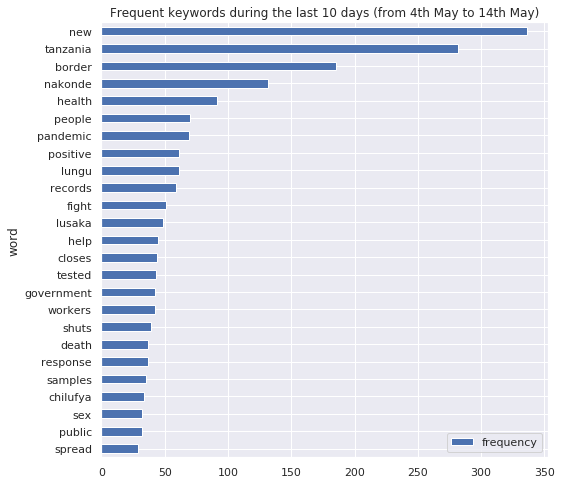

In [72]:
fig,ax=plt.subplots(figsize=(8,8))

df_freq.sort_values(by='frequency').plot.barh(x="word",y="frequency",ax=ax)
ax.set_title("Frequent keywords during the last 10 days (from 4th May to 14th May)")
plt.show()

In [57]:
tweet_txt

'evolution excuse shady construction project creative convincing sorry blame zambians asking see faces patients way lungu pf handling raising eyebrows across response politicized point nobody knows real much trust lost lungu pf government normal living loadshedding see thing happening zedtwitterwhy madagascar herbalist making medicine cure yet herbalists busy putting posters enlargement bring back lost loverzambia closed border nakonde embassy dar warned tanzania risks exponential spike claims hospitals capital overwhelmed performed rise tanzania infected dead magufuli accuses health officials exaggerating crisis dug heels refused admit crisis nakonde tanzania border reported really real claiming really would thinking opening schools esp higher learning institutions students come hello fam friday kingtmc drops visuals poundcake freestyle hope ready also tell friend tell friend go viral cai8sgwbldf p3ec3qoyggk9your gifts emergency appeal making difference funds outreach supporters sent 